# **Milestone 2**
---

## Task 1

### Bold
**This line is in bold.**

### Italic
*This line is in italic*

### List
1. one
2. two
    - two_one
    - two_two
    - two_three
3. three

### Quote
> This is a quote

## Data set cleaning

In [52]:
import pandas as pd
import math

In [53]:
df = pd.read_csv("../data/raw/Kepler_Exoplanet_Search_Results.csv")
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [54]:
# remove uncertainty columns
df.drop(columns=["koi_period_err1", "koi_period_err2", "koi_time0bk_err1", "koi_time0bk_err2", "koi_impact_err1", "koi_impact_err2", "koi_duration_err1", "koi_duration_err2",
                "koi_depth_err1", "koi_depth_err2", "koi_prad_err1", "koi_prad_err2", "koi_teq_err1", "koi_teq_err2", "koi_insol_err1", "koi_insol_err2", "koi_steff_err1",
                "koi_steff_err2", "koi_slogg_err1", "koi_slogg_err2", "koi_srad_err1", "koi_srad_err2"], inplace=True)
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,176.40,8.4,1.0,q1_q17_dr25_tce,5638.0,4.296,1.088,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,4500.53,453.3,1.0,q1_q17_dr25_tce,5638.0,4.529,0.903,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,1585.81,10.6,1.0,q1_q17_dr25_tce,6119.0,4.444,1.031,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,5713.41,12.3,1.0,q1_q17_dr25_tce,6173.0,4.447,1.041,294.16489,47.176281,15.385


In [55]:
# remove columns that are not going to be used
df.drop(columns=["koi_kepmag", "koi_model_snr", "koi_tce_plnt_num", "koi_tce_delivname", "koi_insol", "koi_impact"], inplace=True)
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_time0bk,koi_duration,koi_depth,koi_prad,koi_teq,koi_steff,koi_slogg,koi_srad,ra,dec
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,170.538750,2.95750,615.8,2.26,793.0,5455.0,4.467,0.927,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,162.513840,4.50700,874.8,2.83,443.0,5455.0,4.467,0.927,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,175.850252,1.78220,10829.0,14.60,638.0,5853.0,4.544,0.868,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,170.307565,2.40641,8079.2,33.46,1395.0,5805.0,4.564,0.791,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,171.595550,1.65450,603.3,2.75,1406.0,6031.0,4.438,1.046,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,132.016100,4.80600,87.7,1.11,929.0,5638.0,4.296,1.088,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,131.705093,3.22210,1579.2,29.35,2088.0,5638.0,4.529,0.903,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,133.001270,3.11400,48.5,0.72,1608.0,6119.0,4.444,1.031,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,132.181750,0.86500,103.6,1.07,2218.0,6173.0,4.447,1.041,294.16489,47.176281


In [56]:
# rename columns
# detail column expanations will be included, but for now please refer to https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html
df.rename(columns={"rowid":"id", "kepid":"Kepler id", "kepoi_name":"KOI Name", "Kepler_name":"Kepler Name", "koi_disposition":"Exoplanet Archive Disposition",
                  "koi_pdisposition":"Disposition Using Kepler Data", "koi_score":"Confidence", "koi_fpflag_nt":"Not Transit Like", "koi_fpflag_ss":"Stellar Eclipse",
                  "koi_fpflag_co":"Centroid Offset", "koi_fpflag_ec":"Contamination", "koi_period":"Orbital Period (days)", "koi_time0bk":"Transit Epoch",
                  "koi_duration":"Transit Duration (hours)", "koi_depth":"Transit Depth (parts per million)", "koi_prad":"Planetary Radius (Earth radii)",
                  "koi_teq":"Equilibrium Temperature (Kelvin)", "koi_steff":"Stellar Effective Temperature (Kelvin)", "koi_slogg":"Stellar Surface Gravity (log10(cm s-2)",
                  "koi_srad":"Stellar Radius (solar radii)", "ra":"Right Ascension", "dec":"Declination"}, inplace=True)
df

,id,Kepler id,KOI Name,kepler_name,Exoplanet Archive Disposition,Disposition Using Kepler Data,Confidence,Not Transit Like,Stellar Eclipse,Centroid Offset,...,Transit Epoch,Transit Duration (hours),Transit Depth (parts per million),Planetary Radius (Earth radii),Equilibrium Temperature (Kelvin),Stellar Effective Temperature (Kelvin),Stellar Surface Gravity (log10(cm s-2),Stellar Radius (solar radii),Right Ascension,Declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,170.538750,2.95750,615.8,2.26,793.0,5455.0,4.467,0.927,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,162.513840,4.50700,874.8,2.83,443.0,5455.0,4.467,0.927,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,175.850252,1.78220,10829.0,14.60,638.0,5853.0,4.544,0.868,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,170.307565,2.40641,8079.2,33.46,1395.0,5805.0,4.564,0.791,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,171.595550,1.65450,603.3,2.75,1406.0,6031.0,4.438,1.046,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,132.016100,4.80600,87.7,1.11,929.0,5638.0,4.296,1.088,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,131.705093,3.22210,1579.2,29.35,2088.0,5638.0,4.529,0.903,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,133.001270,3.11400,48.5,0.72,1608.0,6119.0,4.444,1.031,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,132.181750,0.86500,103.6,1.07,2218.0,6173.0,4.447,1.041,294.16489,47.176281


## Data Transforming

In [57]:
# "Not Transit Like", "Stellar Eclipse", "Centroid Offset", "Contamination" flags are left as 0 or 1 for now. I may turn them into true or false later
# "Transit Epoch" is the time of the center of the first detected transit event in Barycentric Julian Day(BJD) offseted by 2454833.0 days
# The offset is corresponded to Noon, Jan 1st, 2009 UTC
# BJD + 2454833.0 days + Transit Epoch = Noon, Jan 1st, 2009 UTC + Transit Epoch = Time of the center of the first detected transit event
arr = []
# Couldn't think of a more efficient way
for index, value in df["Transit Epoch"].items():
    arr.append(pd.Timestamp("Jan 1 2009 12:00 UTC") + pd.DateOffset(days=value))
df.insert(13, "Time of First Transit Event", arr)
df

,id,Kepler id,KOI Name,kepler_name,Exoplanet Archive Disposition,Disposition Using Kepler Data,Confidence,Not Transit Like,Stellar Eclipse,Centroid Offset,...,Time of First Transit Event,Transit Duration (hours),Transit Depth (parts per million),Planetary Radius (Earth radii),Equilibrium Temperature (Kelvin),Stellar Effective Temperature (Kelvin),Stellar Surface Gravity (log10(cm s-2),Stellar Radius (solar radii),Right Ascension,Declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,2009-06-21 00:55:48+00:00,2.95750,615.8,2.26,793.0,5455.0,4.467,0.927,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,2009-06-13 00:19:55.776000+00:00,4.50700,874.8,2.83,443.0,5455.0,4.467,0.927,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,2009-06-26 08:24:21.772800+00:00,1.78220,10829.0,14.60,638.0,5853.0,4.544,0.868,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,2009-06-20 19:22:53.616000+00:00,2.40641,8079.2,33.46,1395.0,5805.0,4.564,0.791,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,2009-06-22 02:17:35.520000+00:00,1.65450,603.3,2.75,1406.0,6031.0,4.438,1.046,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,2009-05-13 12:23:11.040000+00:00,4.80600,87.7,1.11,929.0,5638.0,4.296,1.088,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,2009-05-13 04:55:20.035200+00:00,3.22210,1579.2,29.35,2088.0,5638.0,4.529,0.903,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,2009-05-14 12:01:49.728000+00:00,3.11400,48.5,0.72,1608.0,6119.0,4.444,1.031,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,2009-05-13 16:21:43.200000+00:00,0.86500,103.6,1.07,2218.0,6173.0,4.447,1.041,294.16489,47.176281


In [58]:
# Because Earth is not perfectly round, neither are the exoplanets, this is in no way accurate
# this new column only serves as visual aid, because radius in km is more relatable
arr = []
EARTH_RADIUS = 6371    # using 6371km as Earth radius
for index, value in df["Planetary Radius (Earth radii)"].items():
    arr.append(value * EARTH_RADIUS)
df.insert(17, "Planetary Radius (km)", arr)
df

,id,Kepler id,KOI Name,kepler_name,Exoplanet Archive Disposition,Disposition Using Kepler Data,Confidence,Not Transit Like,Stellar Eclipse,Centroid Offset,...,Transit Duration (hours),Transit Depth (parts per million),Planetary Radius (Earth radii),Planetary Radius (km),Equilibrium Temperature (Kelvin),Stellar Effective Temperature (Kelvin),Stellar Surface Gravity (log10(cm s-2),Stellar Radius (solar radii),Right Ascension,Declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,2.95750,615.8,2.26,14398.46,793.0,5455.0,4.467,0.927,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,4.50700,874.8,2.83,18029.93,443.0,5455.0,4.467,0.927,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,1.78220,10829.0,14.60,93016.60,638.0,5853.0,4.544,0.868,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,2.40641,8079.2,33.46,213173.66,1395.0,5805.0,4.564,0.791,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,1.65450,603.3,2.75,17520.25,1406.0,6031.0,4.438,1.046,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,4.80600,87.7,1.11,7071.81,929.0,5638.0,4.296,1.088,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,3.22210,1579.2,29.35,186988.85,2088.0,5638.0,4.529,0.903,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,3.11400,48.5,0.72,4587.12,1608.0,6119.0,4.444,1.031,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,0.86500,103.6,1.07,6816.97,2218.0,6173.0,4.447,1.041,294.16489,47.176281


In [59]:
# Stellar surface gravity is better in m/s^2
# log10(x) = value
# x = 10^value
# cm/s^2 / 100 = m/s^2
arr = []
for index, value in df["Stellar Surface Gravity (log10(cm s-2)"].items():
    arr.append(math.pow(10, value) / 100)
df.insert(21, "Stellar Surface Gravity (m/s^2)", arr)
df

,id,Kepler id,KOI Name,kepler_name,Exoplanet Archive Disposition,Disposition Using Kepler Data,Confidence,Not Transit Like,Stellar Eclipse,Centroid Offset,...,Transit Depth (parts per million),Planetary Radius (Earth radii),Planetary Radius (km),Equilibrium Temperature (Kelvin),Stellar Effective Temperature (Kelvin),Stellar Surface Gravity (log10(cm s-2),Stellar Surface Gravity (m/s^2),Stellar Radius (solar radii),Right Ascension,Declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,615.8,2.26,14398.46,793.0,5455.0,4.467,293.089325,0.927,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,874.8,2.83,18029.93,443.0,5455.0,4.467,293.089325,0.927,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,10829.0,14.60,93016.60,638.0,5853.0,4.544,349.945167,0.868,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,8079.2,33.46,213173.66,1395.0,5805.0,4.564,366.437575,0.791,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,603.3,2.75,17520.25,1406.0,6031.0,4.438,274.157417,1.046,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,87.7,1.11,7071.81,929.0,5638.0,4.296,197.696964,1.088,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,1579.2,29.35,186988.85,2088.0,5638.0,4.529,338.064836,0.903,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,48.5,0.72,4587.12,1608.0,6119.0,4.444,277.971327,1.031,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,103.6,1.07,6816.97,2218.0,6173.0,4.447,279.898132,1.041,294.16489,47.176281


In [60]:
# Stellar Radius in km is only an aid in relatablity
SUN_RADIUS = 696340
arr = []
for index, value in df["Stellar Radius (solar radii)"].items():
    arr.append(value * SUN_RADIUS)
df.insert(23, "Stellar Radius (km)", arr)
df

,id,Kepler id,KOI Name,kepler_name,Exoplanet Archive Disposition,Disposition Using Kepler Data,Confidence,Not Transit Like,Stellar Eclipse,Centroid Offset,...,Planetary Radius (Earth radii),Planetary Radius (km),Equilibrium Temperature (Kelvin),Stellar Effective Temperature (Kelvin),Stellar Surface Gravity (log10(cm s-2),Stellar Surface Gravity (m/s^2),Stellar Radius (solar radii),Stellar Radius (km),Right Ascension,Declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,2.26,14398.46,793.0,5455.0,4.467,293.089325,0.927,645507.18,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,2.83,18029.93,443.0,5455.0,4.467,293.089325,0.927,645507.18,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,14.60,93016.60,638.0,5853.0,4.544,349.945167,0.868,604423.12,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,33.46,213173.66,1395.0,5805.0,4.564,366.437575,0.791,550804.94,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,2.75,17520.25,1406.0,6031.0,4.438,274.157417,1.046,728371.64,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,1.11,7071.81,929.0,5638.0,4.296,197.696964,1.088,757617.92,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,29.35,186988.85,2088.0,5638.0,4.529,338.064836,0.903,628795.02,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,0.72,4587.12,1608.0,6119.0,4.444,277.971327,1.031,717926.54,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,1.07,6816.97,2218.0,6173.0,4.447,279.898132,1.041,724889.94,294.16489,47.176281


In [61]:
# Mass of the star is also in no way accurate, because it is based on Stellar Radius in km
# g = (G*M)/r^2
# M = (g*r^2)/G
GRAVITIONAL_CONSTANT = 6.67408 * math.pow(10, -11)
arr = []
r = df["Stellar Radius (km)"]
g = df["Stellar Surface Gravity (m/s^2)"]
size = df.shape[0]
for i in range(0, size):
    arr.append((g[i] * math.pow(r[i] * 1000, 2)) / GRAVITIONAL_CONSTANT)
df.insert(24, "Mass of the Star (kg)", arr)
df

,id,Kepler id,KOI Name,kepler_name,Exoplanet Archive Disposition,Disposition Using Kepler Data,Confidence,Not Transit Like,Stellar Eclipse,Centroid Offset,...,Planetary Radius (km),Equilibrium Temperature (Kelvin),Stellar Effective Temperature (Kelvin),Stellar Surface Gravity (log10(cm s-2),Stellar Surface Gravity (m/s^2),Stellar Radius (solar radii),Stellar Radius (km),Mass of the Star (kg),Right Ascension,Declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,14398.46,793.0,5455.0,4.467,293.089325,0.927,645507.18,1.829830e+30,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,18029.93,443.0,5455.0,4.467,293.089325,0.927,645507.18,1.829830e+30,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,93016.60,638.0,5853.0,4.544,349.945167,0.868,604423.12,1.915538e+30,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,213173.66,1395.0,5805.0,4.564,366.437575,0.791,550804.94,1.665729e+30,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,17520.25,1406.0,6031.0,4.438,274.157417,1.046,728371.64,2.179288e+30,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,7071.81,929.0,5638.0,4.296,197.696964,1.088,757617.92,1.700235e+30,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,186988.85,2088.0,5638.0,4.529,338.064836,0.903,628795.02,2.002750e+30,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,4587.12,1608.0,6119.0,4.444,277.971327,1.031,717926.54,2.146686e+30,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,6816.97,2218.0,6173.0,4.447,279.898132,1.041,724889.94,2.203701e+30,294.16489,47.176281


In [62]:
#df.to_csv("../data/processed/initial_clean_up.csv", index=False)

## Method Chain

In [1]:
import pandas as pd
from scripts import data_transform as dt
#from scripts import save_df_to_csv as sa

df = (
    pd.read_csv("../data/raw/Kepler_Exoplanet_Search_Results.csv")
    .drop(columns=["koi_period_err1", "koi_period_err2", "koi_time0bk_err1", "koi_time0bk_err2", "koi_impact_err1",
                   "koi_impact_err2", "koi_duration_err1", "koi_duration_err2", "koi_depth_err1", "koi_depth_err2", 
                   "koi_prad_err1", "koi_prad_err2", "koi_teq_err1", "koi_teq_err2", "koi_insol_err1", "koi_insol_err2",
                   "koi_steff_err1", "koi_steff_err2", "koi_slogg_err1", "koi_slogg_err2", "koi_srad_err1", "koi_srad_err2",
                   "koi_kepmag", "koi_model_snr", "koi_tce_plnt_num", "koi_tce_delivname", "koi_insol", "koi_impact"])
    .rename(columns={"rowid":"id", "kepid":"Kepler id", "kepoi_name":"KOI Name", "Kepler_name":"Kepler Name", "koi_disposition":"Exoplanet Archive Disposition",
                  "koi_pdisposition":"Disposition Using Kepler Data", "koi_score":"Confidence", "koi_fpflag_nt":"Not Transit Like", "koi_fpflag_ss":"Stellar Eclipse",
                  "koi_fpflag_co":"Centroid Offset", "koi_fpflag_ec":"Contamination", "koi_period":"Orbital Period (days)", "koi_time0bk":"Transit Epoch",
                  "koi_duration":"Transit Duration (hours)", "koi_depth":"Transit Depth (parts per million)", "koi_prad":"Planetary Radius (Earth radii)",
                  "koi_teq":"Equilibrium Temperature (Kelvin)", "koi_steff":"Stellar Effective Temperature (Kelvin)", "koi_slogg":"Stellar Surface Gravity (log10(cm s-2)",
                  "koi_srad":"Stellar Radius (solar radii)", "ra":"Right Ascension", "dec":"Declination"})
    )

# Can't chain these, they don't return anything
dt.get_transit_time(df)
dt.get_planet_radius(df)
dt.get_gravity(df)
dt.get_star_radius(df)
dt.get_star_mass(df)

#sa.save_to_csv(df)

File will be saved to ../data/processed


Enter file name with .csv : testing_chain.csv


Done


## Testing

In [1]:
from scripts import project_functions as pf

df = pf.load_and_process("../data/raw/Kepler_Exoplanet_Search_Results.csv")

df

,id,Kepler id,KOI Name,kepler_name,Exoplanet Archive Disposition,Disposition Using Kepler Data,Confidence,Not Transit Like,Stellar Eclipse,Centroid Offset,...,Planetary Radius (km),Equilibrium Temperature (Kelvin),Stellar Effective Temperature (Kelvin),Stellar Surface Gravity (log10(cm s-2),Stellar Surface Gravity (m/s^2),Stellar Radius (solar radii),Stellar Radius (km),Mass of the Star (kg),Right Ascension,Declination
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,14398.46,793.0,5455.0,4.467,293.089325,0.927,645507.18,1.829830e+30,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,18029.93,443.0,5455.0,4.467,293.089325,0.927,645507.18,1.829830e+30,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,93016.60,638.0,5853.0,4.544,349.945167,0.868,604423.12,1.915538e+30,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,213173.66,1395.0,5805.0,4.564,366.437575,0.791,550804.94,1.665729e+30,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,17520.25,1406.0,6031.0,4.438,274.157417,1.046,728371.64,2.179288e+30,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,7071.81,929.0,5638.0,4.296,197.696964,1.088,757617.92,1.700235e+30,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,186988.85,2088.0,5638.0,4.529,338.064836,0.903,628795.02,2.002750e+30,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,4587.12,1608.0,6119.0,4.444,277.971327,1.031,717926.54,2.146686e+30,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,6816.97,2218.0,6173.0,4.447,279.898132,1.041,724889.94,2.203701e+30,294.16489,47.176281


## EDA

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", font_scale=1)

1. Count of Candidate, Confirmed and False Positive

<AxesSubplot:xlabel='count', ylabel='Exoplanet Archive Disposition'>

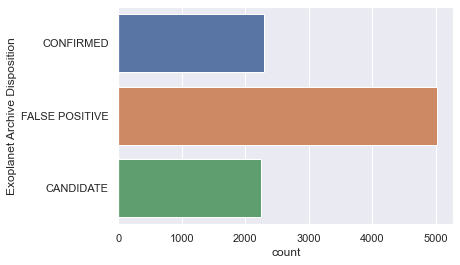

In [11]:
sns.countplot(y="Exoplanet Archive Disposition", data=df)

- Candidates are planets that are in potential habitable zone, terrestrial, and possibly Earth-like
- Confirmed status means they are indeed a planet, but are not habitable by humans
- False positives are those recorded by Kepler, but failed the validation process, caused by one or more of the following reasons:
    - light curve is not consistent with a transiting planet (Not Transit-like)
    - transit-like event most likely caused by an eclipsing binary star, or the planet is self-luminous (Stellar Eclipse)
    - the signal is from a star, not planets (Centroid Offset)
    - flux contamination in the aperture (Contamination)

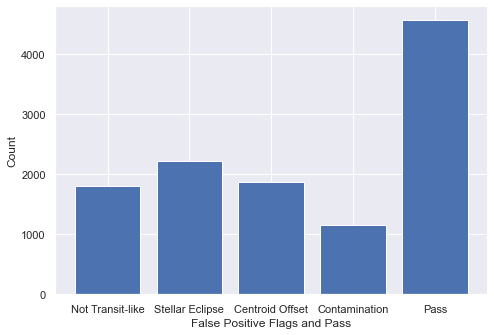

In [23]:
not_transit_like_count = 0
stellar_eclipse_count = 0
centroid_offset_count = 0
contamination_count = 0
pass_count = 0

size = df.shape[0]
not_transit_like = df["Not Transit Like"]
stellar_eclipse = df["Stellar Eclipse"]
centroid_offset = df["Centroid Offset"]
contamination = df["Contamination"]

for i in range(0, size):
    if not_transit_like[i] == 1:
        not_transit_like_count += 1
    if stellar_eclipse[i] == 1:
        stellar_eclipse_count += 1
    if centroid_offset[i] == 1:
        centroid_offset_count += 1
    if contamination[i] == 1:
        contamination_count += 1
    if not_transit_like[i] == 0 and stellar_eclipse[i] == 0 and centroid_offset[i] == 0 and contamination[i] == 0:
        pass_count += 1

data = {"Not Transit-like":not_transit_like_count, "Stellar Eclipse":stellar_eclipse_count, "Centroid Offset":centroid_offset_count, "Contamination":contamination_count, "Pass":pass_count}
x = list(data.keys())
y = list(data.values())
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel("False Positive Flags and Pass")
ax.set_ylabel("Count")
ax.bar(x, y)
plt.show()

- Most transit events are caused by panets ecplising their stars, about 4600 passed validation
- Significant seconday events i.e. stellar eclipse are the most common casue of false positive
- False postive caused by flux contamination is the least common one, but still flaged more than 1000 entries

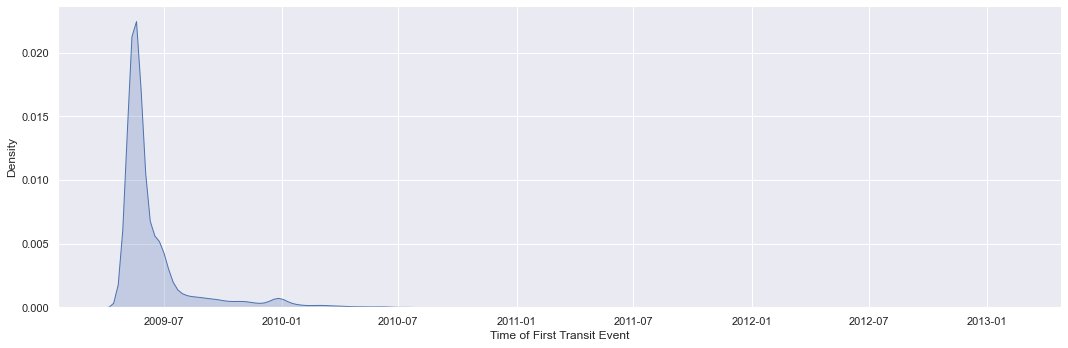

In [34]:
sns.displot(data=df, x="Time of First Transit Event", kind="kde", aspect=3, fill=True)

- The Kepler telescope detected most of transit events of that section of space at the first few months of its mission

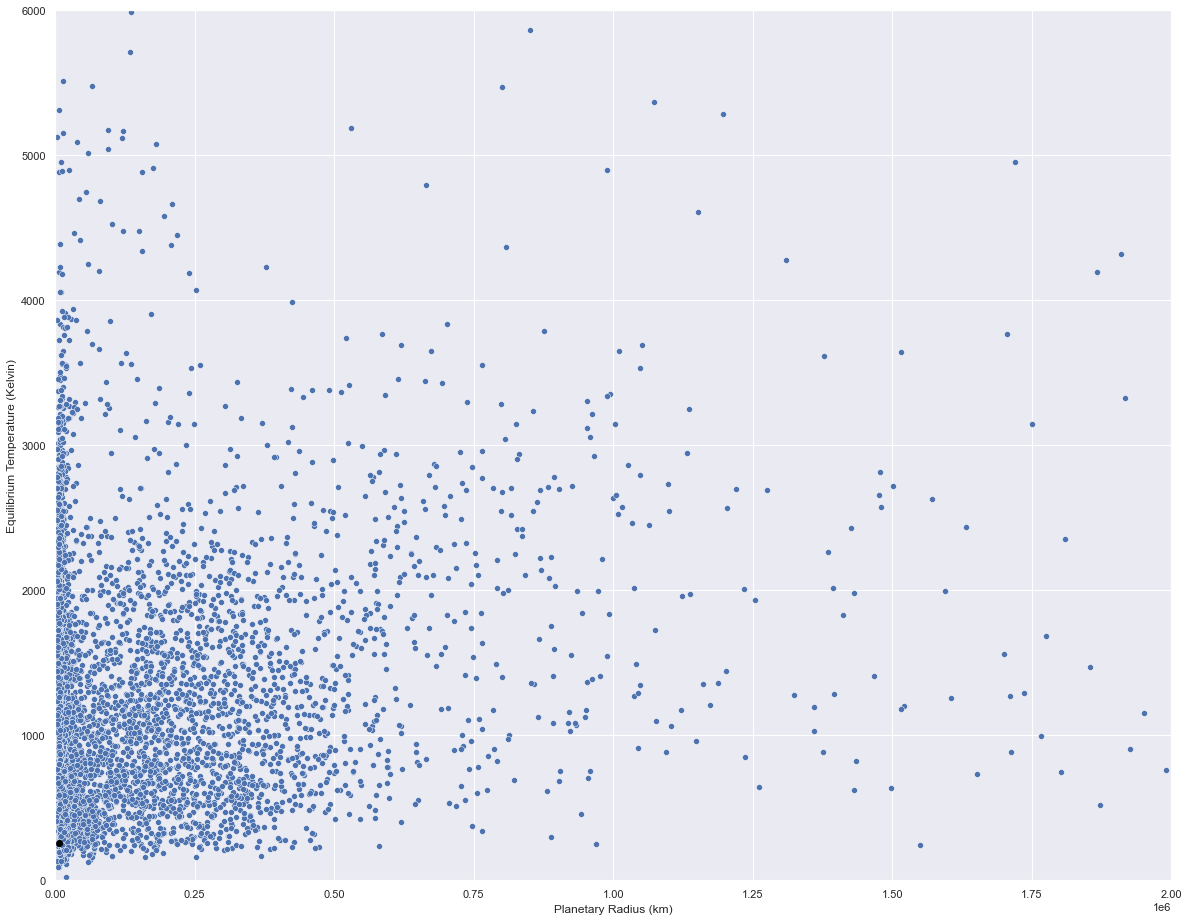

In [52]:
plt.figure(figsize=(20,16))
ax = sns.scatterplot(data=df, x="Planetary Radius (km)", y="Equilibrium Temperature (Kelvin)")
ax.set(xlim=(0, 2000000))
ax.set(ylim=(0, 6000))
plt.scatter(x=6371, y=255, color='black')

- this graph plots radius against Equilibrium Temperature, two defining features of Earth
- it shows how exoplanets's conditions distributes, and how they compare to Earth
- plot excluded 99 planets with radius over 2,000,000 km
- also excluded 27 planets with radius over 6000 k
- the black dot at left bottom corner is Earth (255k Equilibrium Temperature, 6371 km radius)
- Earth is actually very small, and quite cold, just like most of the planets

## Research Question

### Did the Kepler telescope discover most of the candidates at the beginning of its mission?
My hypothesis is that Kepler discovered most of the candidates at the first few months, and discoveries that came late in mission timeline are mostly false postive.

Text(0.5, 0, 'Days passed since mission beginning')

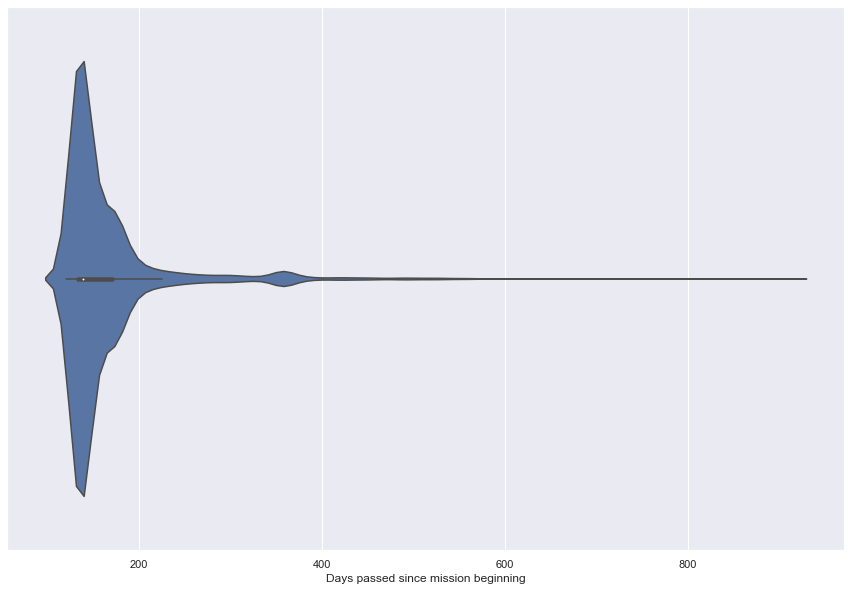

In [63]:
candidate = df[df["Disposition Using Kepler Data"] == "CANDIDATE"]
plt.figure(figsize=(15,10))
ax1 = sns.violinplot(x="Transit Epoch", data=candidate)
ax1.set_xlabel("Days passed since mission beginning")

Text(0.5, 0, 'Days passed since mission beginning')

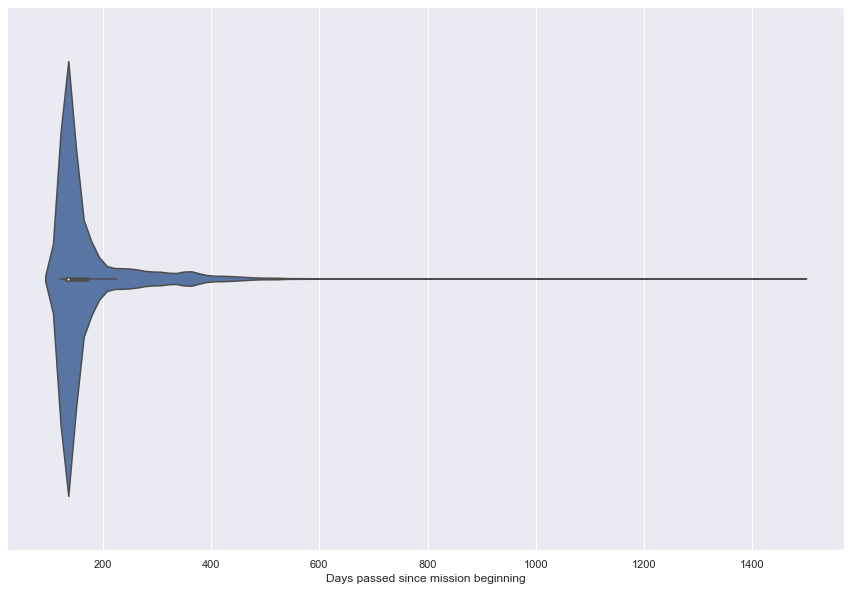

In [64]:
false_postive =  df[df["Disposition Using Kepler Data"] == "FALSE POSITIVE"]
plt.figure(figsize=(15,10))
ax2 = sns.violinplot(x="Transit Epoch", data=false_postive)
ax2.set_xlabel("Days passed since mission beginning")

**Yes, it did discover most of the candidates before the first 200 days of its mission.**

However, my hypothesis is not correct. Kepler also discovered most of its false positives before the 200 day mark.

### Is our Sun above average?

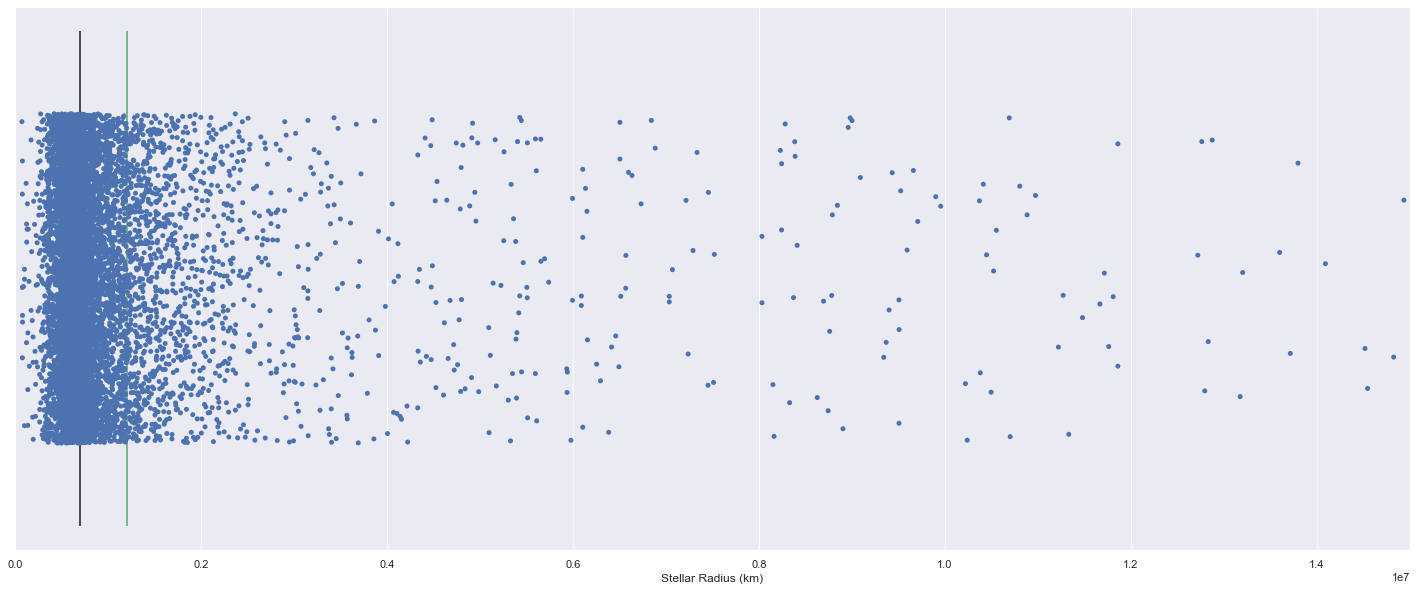

In [85]:
temp = df["Stellar Radius (km)"].mean()
plt.figure(figsize=(25,10))
ax3 = sns.stripplot(x=df["Stellar Radius (km)"])
ax3.set(xlim=(0, 15000000))
ax3.vlines(696340, -0.15, 0.15, color="k")
ax3.vlines(temp, -0.15, 0.15, color="g")

- Black line is where our sun is, green line is the average radius
- plot excluded 40 stars with radius more than 15,000,000 km

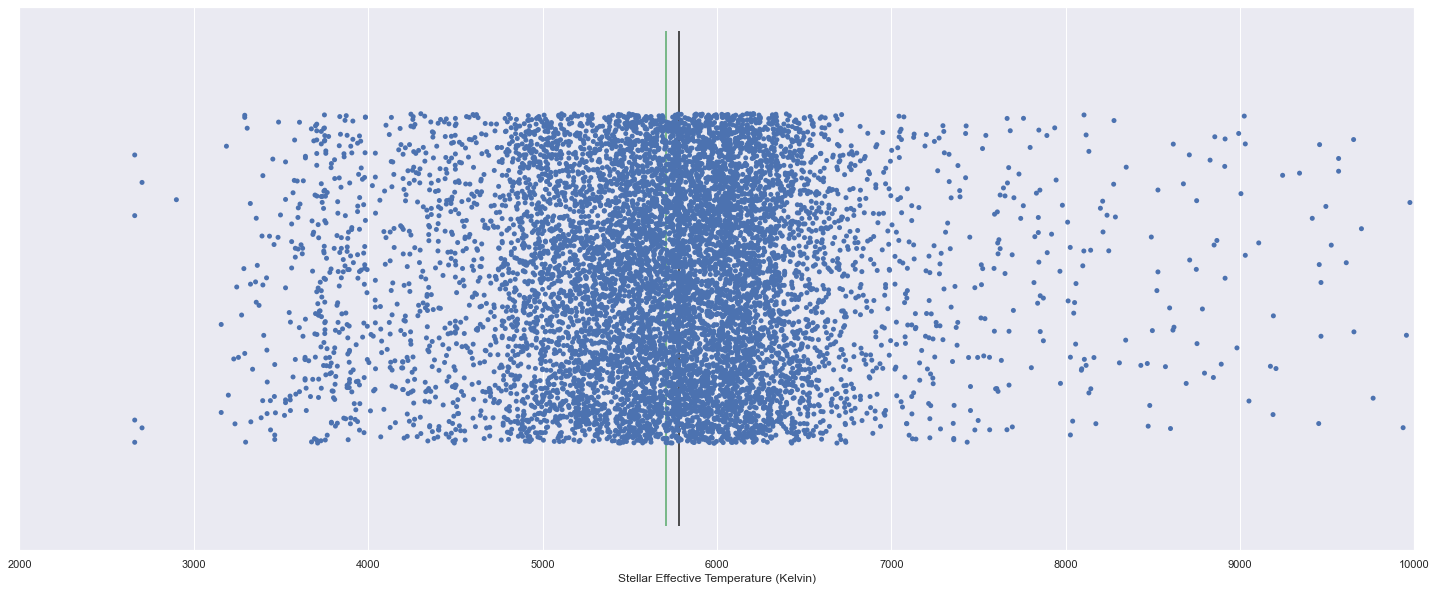

In [90]:
temp = df["Stellar Effective Temperature (Kelvin)"].mean()
plt.figure(figsize=(25,10))
ax4 = sns.stripplot(x=df["Stellar Effective Temperature (Kelvin)"])
ax4.set(xlim=(2000, 10000))
ax4.vlines(5780, -0.15, 0.15, color="k")
ax4.vlines(temp, -0.15, 0.15, color="g")

- Black line is where our sun is, green line is the average stellar effective Temperature
- 14 stars with temperature over 10000k excluded

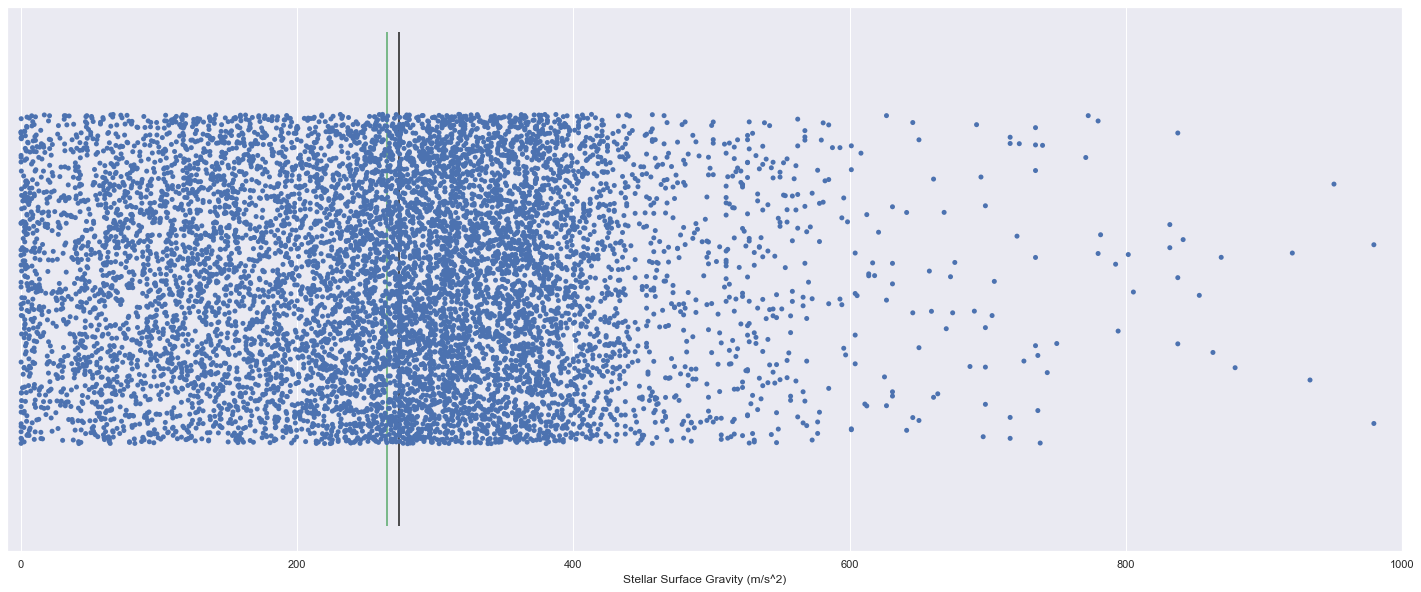

In [94]:
temp = df["Stellar Surface Gravity (m/s^2)"].mean()
plt.figure(figsize=(25,10))
ax5 = sns.stripplot(x=df["Stellar Surface Gravity (m/s^2)"])
ax5.set(xlim=(-10, 1000))
ax5.vlines(274, -0.15, 0.15, color="k")
ax5.vlines(temp, -0.15, 0.15, color="g")

- 27 outlier excluded

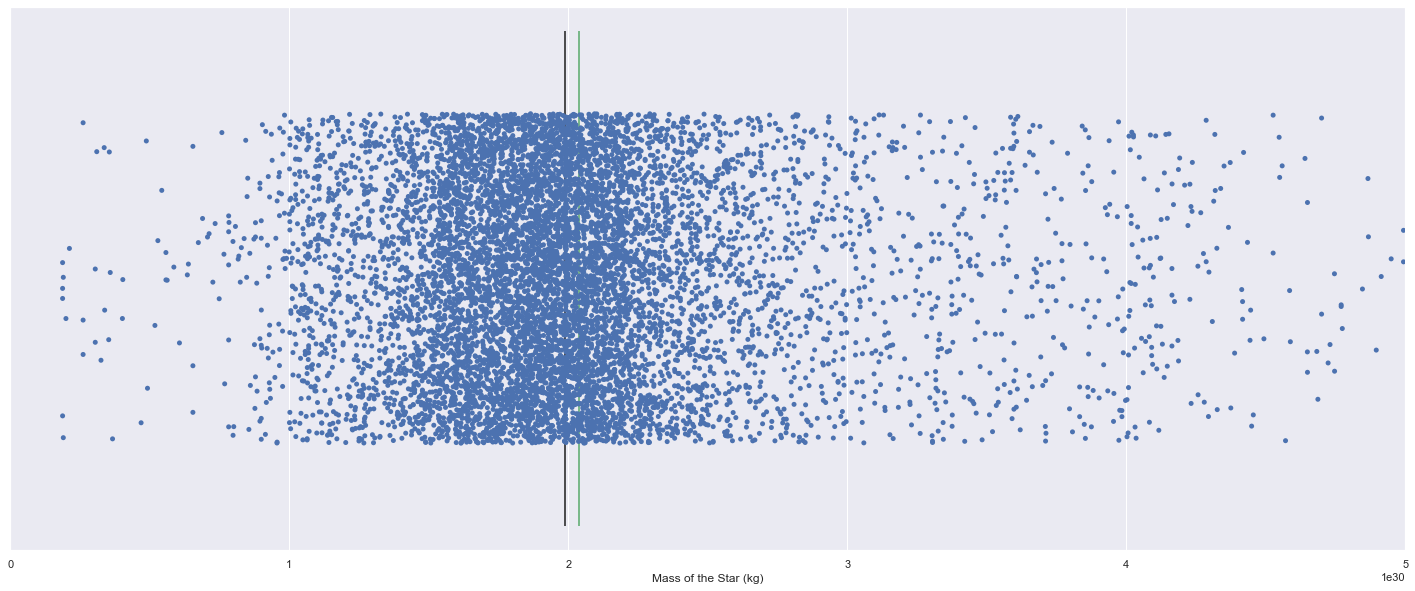

In [98]:
temp = df["Mass of the Star (kg)"].mean()
plt.figure(figsize=(25,10))
ax6 = sns.stripplot(x=df["Mass of the Star (kg)"])
ax6.set(xlim=(0, 5e30))
ax6.vlines(1.989e30, -0.15, 0.15, color="k")
ax6.vlines(temp, -0.15, 0.15, color="g")

- 88 outlier not included

**Our sun falls behind in size, but is above average in stellar effective temperature and surface gravity. It is around the mean of mass of stars.**

**The sun is actually quite average.**

### How long do the exoplanets orbit around their stars?

Average orbital period is 75.67 days
Longest orbiting planet needs a whopping 129995.78 days to go around its star for just one time, about 356.15 years
Fastest orbiting planet takes just 0.24184 days, that is just 5.804 hours


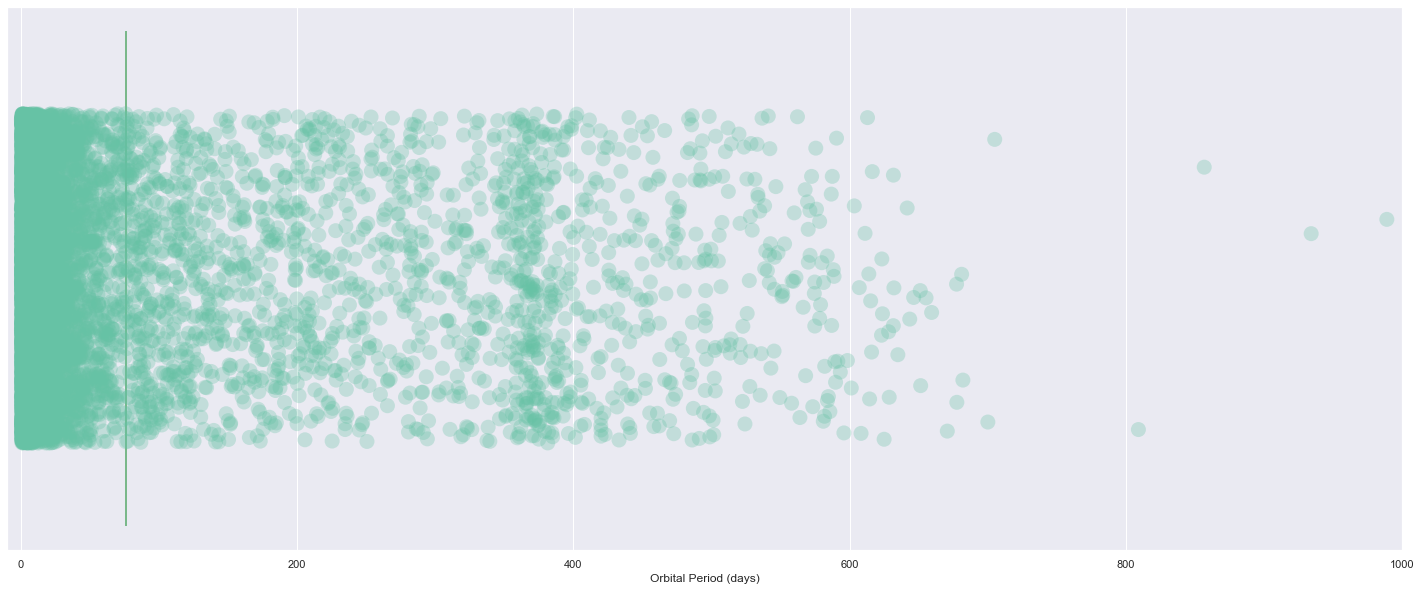

In [123]:
temp = df["Orbital Period (days)"].mean()
plt.figure(figsize=(25,10))
ax7 = sns.stripplot(x=df["Orbital Period (days)"], size = 15, palette="Set2", edgecolor="gray", alpha=.3)
ax7.set(xlim=(-10, 1000))
ax7.vlines(temp, -0.15, 0.15, color="g")
print("Average orbital period is %.2f days" % (df["Orbital Period (days)"].mean()))
print("Longest orbiting planet needs a whopping %.2f days to go around its star for just one time, about %.2f years" % (df["Orbital Period (days)"].max(), df["Orbital Period (days)"].max() / 365))
print("Fastest orbiting planet takes just %.5f days, that is just %.3f hours" % (df["Orbital Period (days)"].min(), df["Orbital Period (days)"].min() * 24))

- excluded 9 planets with orbital period over 1000 days.

**Average orbital period is 75.67 days**

**Longest orbiting planet needs a whopping 129995.78 days to go around its star for just one time, about 356.15 years**

**Fastest orbiting planet takes just 0.24184 days, that is just 5.804 hours**

### How are the planets distributed across the sky?
Right Ascenion and Declination are kind of like the longitude and latitude for the night sky.

This is in no way the actually diagram of planet distribution. But I think it is a great aid for imagination.

<AxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

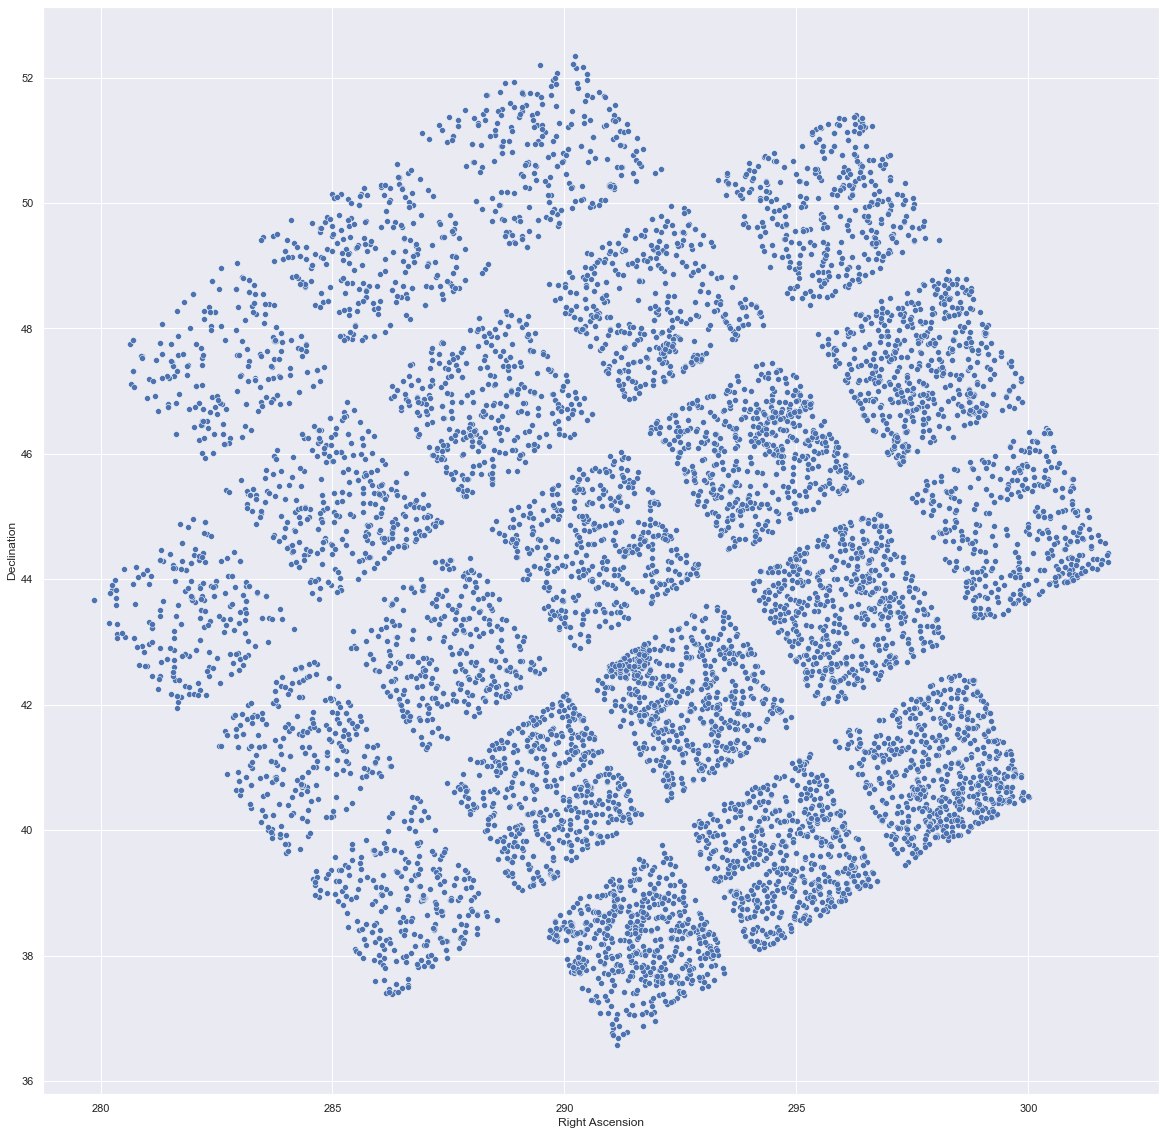

In [124]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x="Right Ascension", y="Declination")

**The Kepler telescope used an array of charge coupled devices to detect light.**

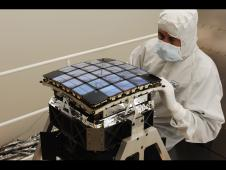 photo credit: [NASA](https://www.nasa.gov/mission_pages/kepler/spacecraft/index.html)

**It pointed at just one group of stars for more than 3 years.**
